In [1]:
import sys, os
sys.path.insert(0,os.path.abspath('..'))
from scripts.project_functions import *
sns.set_theme(style="whitegrid")
df = load_and_process(r"..\..\data\raw\database.csv")

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# Data Analysis:

### Out of the following categories, which contributes the most towards solved / unsolved cases:
- **Race of the victim**
- **Gender of the victim**
- **Age of the victim**
- **Time of year**




## Race of victim vs solved / unsolved cases

In [2]:
df1 = race_analysis(df)
df1

,Victim Race,Crime Solved,Count
0,Asian/Pacific Islander,No,2916
1,Asian/Pacific Islander,Yes,6972
2,Black,No,101104
3,Black,Yes,198754
4,Native American/Alaska Native,No,919
5,Native American/Alaska Native,Yes,3647
6,White,No,82208
7,White,Yes,235159


<AxesSubplot:xlabel='Victim Race', ylabel='Count'>

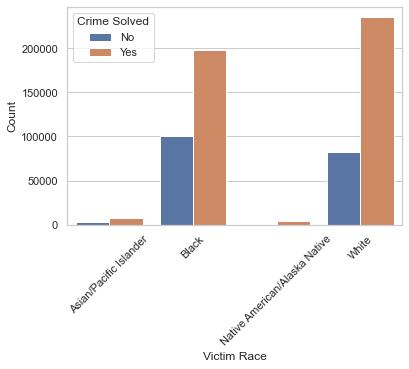

In [3]:
plt.xticks(rotation=45)
sns.barplot(data=df1,y='Count',x='Victim Race', hue = 'Crime Solved')

#### Observation:
From this, we can see that although there is a larger number of victims of the white race than any other in this dataset, the number of unsolved cases for the black race is larger, suggesting race as a possible factor in solving a case. Because the numbers for Asian / Pacific Islanders as well as Native American / Alaskan Natives are too small, let's take a closer look at the solved vs unsolved cases for these.

<AxesSubplot:xlabel='Victim Race', ylabel='Count'>

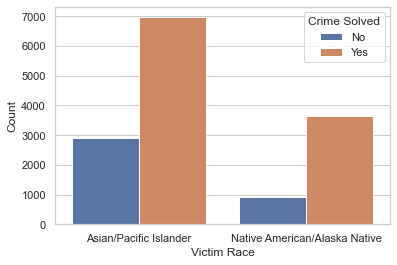

In [4]:
sns.barplot(data=df1.loc[lambda x: x['Victim Race'] != 'Black'].loc[lambda x: x['Victim Race'] != 'White'],y='Count',x='Victim Race', hue = 'Crime Solved')

#### Further Observations:
From this, we can closer get an idea of the distribution between solved and unsolved cases for these groups. In order to take a closer look, we should calculate the percentage of cases solved for each race to see if there is a trend. 

Some hand calculations result in the following values for percentage solved:
- *Asian / Pacific Islander Percentage*: **70.5 % solved**
- *Black*: **66.3% solved**
- *Native American / Alaska Native*: **79.9% solved**
- *White*: **74.1% solved**

From this, it appears that most races have a percentage of solved cases within ± 10% of each other, which although seeming reasonable becomes odd when considering the total number of victims per race.

Total Victims: 
- *Asian / Pacific Islander Percentage*: **9,888**
- *Black*: **299,858**
- *Native American / Alaska Native*: **4,566**
- *White*: **317,367**

Due to the number of cases, the percentile of solved cases per race becomes less impressive, as there is still an 80% solve rate for the white race, but other races with much less victims still have a lower percent of cases solved.


## Gender of victim vs solved / unsolved cases

In [5]:
df2 = gender_analysis(df)
df2

,Victim Sex,Crime Solved,Count
0,Female,No,32532
1,Female,Yes,109461
2,Male,No,154615
3,Male,Yes,335071


<AxesSubplot:xlabel='Victim Sex', ylabel='Count'>

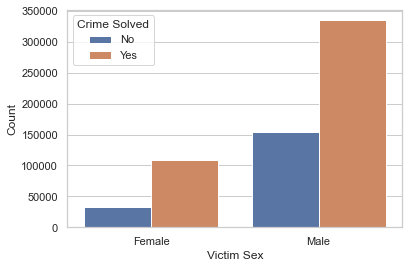

In [6]:
sns.barplot(data=df2,y='Count',x='Victim Sex', hue = 'Crime Solved')

#### Observation:

This graph depicts the distribution of solved vs unsolved cases for the sex of the victim. From this we can see that there is in general less victims which are females. In order to take a closer more precise look, we can again look at the percentages for each gender.

The hand calculated percentages are shown below:
- *Female*: **77.1% Solved** 
- *Male*: **68.4% Solved**

Again comparing this against the total number of victims for each gender can give us some context for these percentages.
- *Female*: **141,993** 
- *Male*: **489,686**

Although there are *29%* less female victims than male victims, the number of solved cases is only approximately 9% higher, suggesting the gender is possibly a factor in whether or not a case gets solved. An interesting investigation to do from this would be to analyze whether or not cases involving victims that are females of minority races are solved less.   


## Year of Crime vs Solved & Unsolved Cases

In [7]:
dfYear = year_analysis(df)
dfYear

,Year,Crime Solved,Count
0,1980,No,6061
1,1980,Yes,16369
2,1981,No,5349
3,1981,Yes,15724
4,1982,No,5431
...,...,...,...
65,2012,Yes,10467
66,2013,No,4333
67,2013,Yes,9948
68,2014,No,4309


## Let's begin by looking at a heatmap of solved vs unsolved by year
This will give us some darker spots to look for and see any patterns by year

<AxesSubplot:xlabel='Crime Solved', ylabel='Year'>

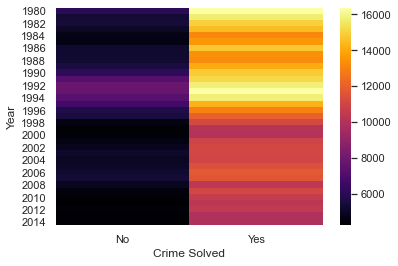

In [8]:
dfYear2 = dfYear.pivot_table(index='Year', columns='Crime Solved', values='Count')
sns.heatmap(dfYear2, cmap='inferno', linecolor='white')

##### Observations:
It seems as if a great percentage of crimes are solved more than not but we can spot out some observations from this heat map such as:
- A period from 1990 - 1996 where murder was very numerous, solved or not
- During the 1980s murder was solved more often than not
- Post 1996 while murder rates dropped so did the amount of solved cases, you can see a more purple hue in the Yes column and a more purple hue in the No column